In [1]:
import sys
sys.path.append('../')
from utils import hpa_dataset_v1
import pandas as pd
import numpy as np
import albumentations as albu
from augmix import RandomAugMix
import matplotlib.pyplot as plt

In [92]:
train_base_df = pd.read_csv('../../data/train_fold_v9.csv')
DATA_PATH = '../../data/train_h5_256_40000_v5'
aug_fn = albu.Compose(
        [
            #'''
            RandomAugMix(p=.5),
            #albu.OneOf([
            #    albu.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.4, rotate_limit=40, border_mode = 1),
            #    albu.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, border_mode=1),
            #    albu.GridDistortion(num_steps=3, distort_limit=0.3, interpolation=1, border_mode=1),#num_steps=5, distort_limit=0.3
            #], p=.5),
            
            #'''
            albu.HorizontalFlip(p=.5),
            albu.VerticalFlip(p=.5),
            albu.Cutout(
                num_holes=12,
                max_h_size=16,
                max_w_size=16,
                fill_value=0,
                p=0.5,
            ),
            albu.ToFloat(max_value=255.,always_apply=True),
        ]
    )


train_dataset = hpa_dataset_v1(main_df = train_base_df, path = DATA_PATH, augmentation = aug_fn, aug_per= 0.8, 
                                    cells_used = 16,label_smoothing = False,
                                     l_alp = 0.0, size = 256, cell_repetition = True)

0.544906

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.9372549


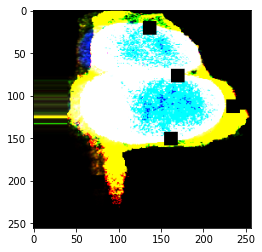

In [113]:
v = train_dataset.__getitem__(79)
print(v['image'].max())
k = v['image'][7]*255
plt.imshow(k)

In [12]:
k

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.01568628, 0.        , 0.        ],
        [0.05490196, 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.24705882, 0.08235294, 0.        ],
        [1.4117647 , 0.7058824 , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.10980392, 0.16470589, 0.        ],
        [0.40784314, 0.20392157, 0.        ],
        [0.08627451, 0.17254902, 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0